In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2RvbmFsZGhhbGUvRG9jdW1lbnRzL0lBQU1ML01MQm9vaw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749746015.7416215, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749746015.7570558, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749746013.3245404, "/opt/anaconda3/lib/python3.13/codecs.py": 1749746012.57125, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749746014.1131392, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749746014.1056273, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749746014.921781, "/opt/anaconda3/lib/python3.13/abc.py": 1749746012.4960408, "/opt/anaconda3/lib/python3.13/io.py": 1749746012.8010643, "/opt/anaconda3/lib/python3.13/stat.py": 1749746013.1405113, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749746012.3873768, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749746012.7239525, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749746012.9542572, "/opt/anaconda3/lib/python3.13/os.py": 1749746012.9050896, "/opt/anaconda3/lib/python3.13/_sitebuiltin

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

# Load Ames dataset directly
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame

# Subset variables to match the R version
keep = [
    "SalePrice","BedroomAbvGr","YearBuilt","MoSold","LotArea","Street","CentralAir",
    "1stFlrSF","2ndFlrSF","FullBath","HalfBath","Fireplaces","GarageArea",
    "GrLivArea","TotRmsAbvGrd"
]
df = df[keep].copy()

# Clean up names to match Python variable rules
df.columns = ["Sale_Price","Bedroom_AbvGr","Year_Built","Mo_Sold","Lot_Area","Street",
              "Central_Air","First_Flr_SF","Second_Flr_SF","Full_Bath","Half_Bath",
              "Fireplaces","Garage_Area","Gr_Liv_Area","TotRms_AbvGrd"]

# Drop missing rows
df = df.dropna()

# Train/test split (70/30)
train, test = train_test_split(df, test_size=0.3, random_state=123)

# Identify predictors and target
y_train = train["Sale_Price"]
y_test  = test["Sale_Price"]
X_train = train.drop(columns="Sale_Price")
X_test  = test.drop(columns="Sale_Price")

cat_vars = ["Street","Central_Air"]
num_vars = [c for c in X_train.columns if c not in cat_vars]

# Preprocess: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(drop="first"), cat_vars)
])

In [3]:
alphas = np.logspace(4, -4, 80)
ridge = Pipeline([
    ("prep", preprocessor),
    ("model", RidgeCV(alphas=alphas, scoring="neg_mean_squared_error", cv=10))
])
ridge.fit(X_train, y_train)

ridge_best = ridge.named_steps["model"].alpha_
print("Best Ridge alpha:", ridge_best)

# Evaluate RMSE on test set
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Test RMSE (Ridge):", ridge_rmse)

Best Ridge alpha: 94.33732216299774
Test RMSE (Ridge): 37055.84511170759


In [4]:
lasso = Pipeline([
    ("prep", preprocessor),
    ("model", LassoCV(alphas=alphas, cv=10, max_iter=20000))
])
lasso.fit(X_train, y_train)

lasso_best = lasso.named_steps["model"].alpha_
print("Best Lasso alpha:", lasso_best)

lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Test RMSE (Lasso):", lasso_rmse)

Best Lasso alpha: 11.568875283162821
Test RMSE (Lasso): 37074.74978063246


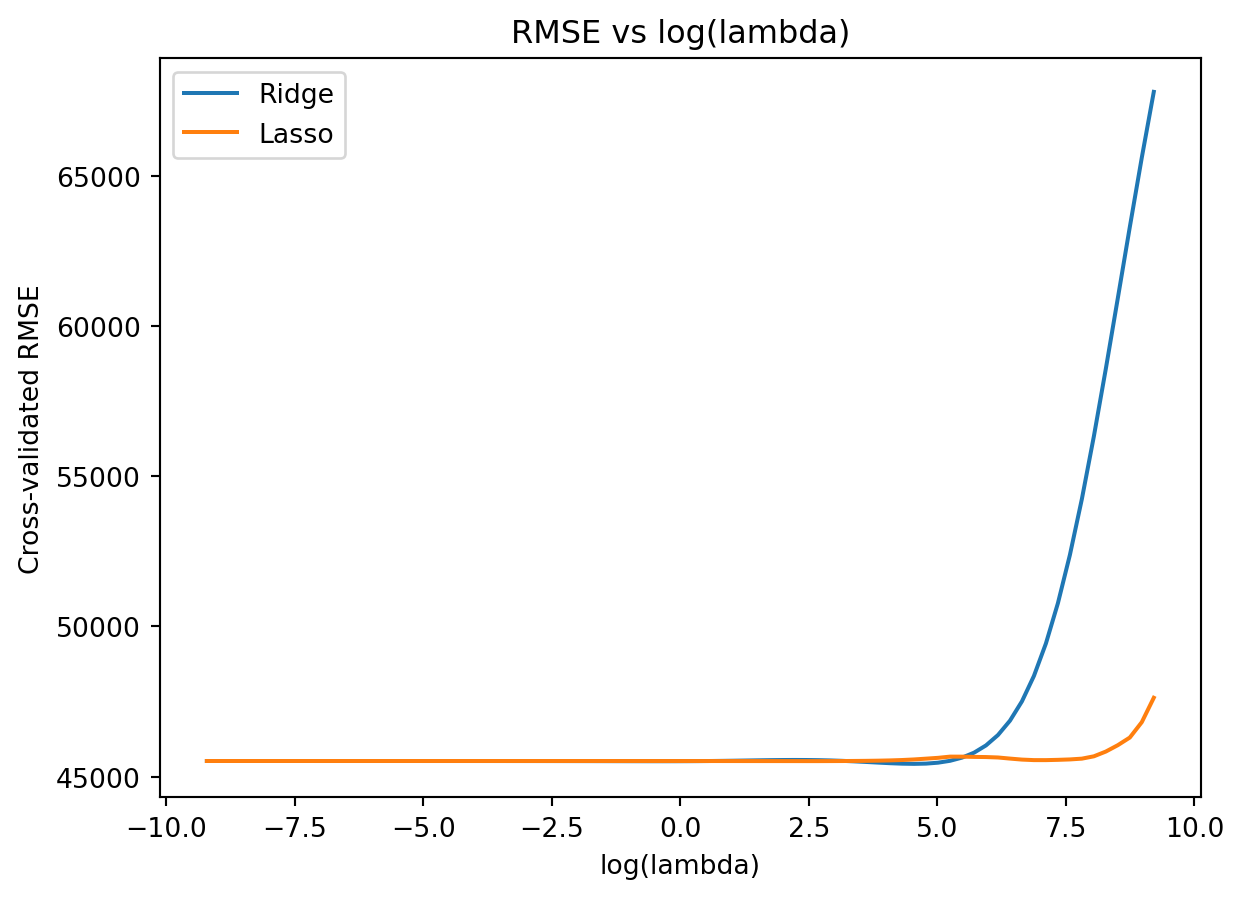

In [5]:
# Compute RMSE path manually
def cv_rmse(model_class, X, y, alphas):
    rmse = []
    for a in alphas:
        model = Pipeline([
            ("prep", preprocessor),
            ("model", model_class(alpha=a, max_iter=20000))
        ])
        scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=KFold(10, shuffle=True, random_state=123))
        rmse.append(np.sqrt(-scores.mean()))
    return np.array(rmse)

from sklearn.linear_model import Ridge, Lasso
ridge_rmse_path = cv_rmse(Ridge, X_train, y_train, alphas)
lasso_rmse_path = cv_rmse(Lasso, X_train, y_train, alphas)

plt.figure()
plt.plot(np.log(alphas), ridge_rmse_path, label="Ridge")
plt.plot(np.log(alphas), lasso_rmse_path, label="Lasso")
plt.xlabel("log(lambda)")
plt.ylabel("Cross-validated RMSE")
plt.title("RMSE vs log(lambda)")
plt.legend()
plt.show()

In [6]:
l1_ratios = np.linspace(0, 1, 6)
en_cv = Pipeline([
    ("prep", preprocessor),
    ("model", ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=10, max_iter=50000))
])
en_cv.fit(X_train, y_train)

print("Best Elastic Net alpha:", en_cv.named_steps["model"].alpha_)
print("Best Elastic Net l1_ratio:", en_cv.named_steps["model"].l1_ratio_)

en_pred = en_cv.predict(X_test)
en_rmse = np.sqrt(mean_squared_error(y_test, en_pred))
print("Test RMSE (Elastic Net):", en_rmse)

Best Elastic Net alpha: 0.55825862688627
Best Elastic Net l1_ratio: 0.8
Test RMSE (Elastic Net): 37134.497858434275


In [7]:
results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "Test_RMSE": [ridge_rmse, lasso_rmse, en_rmse]
})
print(results.sort_values("Test_RMSE"))

         Model     Test_RMSE
0        Ridge  37055.845112
1        Lasso  37074.749781
2  Elastic Net  37134.497858
